### Bibliotecas necessárias


In [10]:
# Implementation of matplotlib function
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
import time as t



### Abrir imagem

In [11]:
ddepth = cv2.CV_16UC1
scale = 1
delta = 0
alpha = 2
beta = 50

#image = cv2.imread("image5.png", cv2.IMREAD_COLOR) ## CHAVE ALTO CONSTRASTE
#image = cv2.imread("image2.jpg", cv2.IMREAD_COLOR)
#image = cv2.imread("image6.jpg", cv2.IMREAD_COLOR) ## Linha fina
#image = cv2.imread("image7.jfif", cv2.IMREAD_COLOR) ##CIRCULAR
#image = cv2.imread("image10.jpg", cv2.IMREAD_COLOR)
image = cv2.imread("image11.png", cv2.IMREAD_COLOR)


(height, width) = image.shape[:2]
print("Altura da imagem: {} | Largura da imagem: {}".format(height, width))

Altura da imagem: 750 | Largura da imagem: 702


### Conversão para escala de cinza

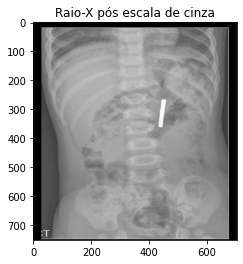

In [12]:
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #Converte para escala de cinza
plt.gray()
plt.imshow(grayImage)
plt.title("Raio-X pós escala de cinza")
plt.show()

### Aplicação de um filtro gaussiano

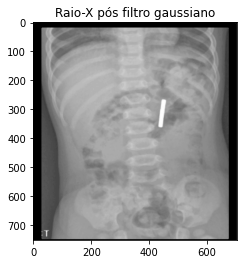

In [13]:
#imageGauss = cv2.GaussianBlur(grayImage, (3, 3), 0)
imageGauss = cv2.medianBlur(grayImage, 5)

plt.imshow(imageGauss)
plt.title('Raio-X pós filtro gaussiano')
plt.show()

### Ajuste de brilho e contraste
- Implementação de uma escala de ajuste para brilho e contraste, intervalo [-127, 127] semelhante ao GIMP

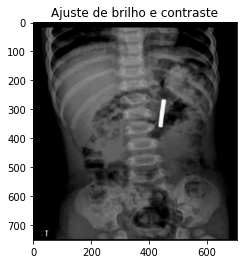

In [14]:
brightness = -100 # brilho inicial
contrast = 50 # contraste inicial
shadow = 0
highlight = 255 + brightness

alpha_b = (highlight - shadow)/255
gamma_b = shadow
procImage = cv2.addWeighted(imageGauss, alpha_b, imageGauss, 0, gamma_b)
f = 131*(contrast + 127)/(127*(131-contrast)) 
alpha_c = f
gamma_c = 127*(1-f)

procImage = cv2.addWeighted(procImage, alpha_c, procImage, 0, gamma_c)

plt.imshow(procImage)
plt.title('Ajuste de brilho e contraste')
plt.show()

### Detector Canny

70.0


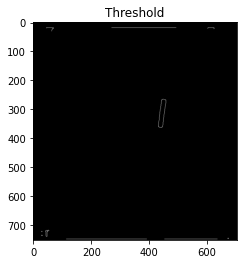

In [15]:
#ret, imgThreshold = cv2.threshold(grad, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#ret, imgThreshold = cv2.threshold(grad, 10, 255, cv2.THRESH_BINARY) ##SOBEL
ret, imgThreshold = cv2.threshold(dst, 70, 255, cv2.THRESH_BINARY) ##CANNY
#cv2.thre
print(ret)
plt.imshow(imgThreshold)
plt.title("Threshold")
plt.show()


### Detecção de linhas

13


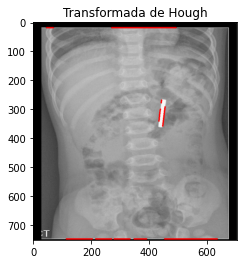

In [16]:
# lines = cv2.HoughLinesP(image: Mat, rho, theta, threshold, minLineLength=..., maxLineGap=...) 
#lines = cv2.HoughLinesP(imgThreshold, rho=1, theta=np.pi/180, threshold=30, minLineLength=1,maxLineGap=1) ## COM THRESHOLD
lines = cv2.HoughLinesP(dst, rho=1, theta=np.pi/180, threshold=30, minLineLength=1,maxLineGap=2)

try:
    if(lines.any != None):
        print(len(lines))

        for line in lines:
            x1, y1, x2, y2 = line[0]
            #print(line[0])
            cv2.line(image, (x1, y1), (x2, y2), (255,0,0),4)
        plt.imshow(image)
        plt.title("Transformada de Hough")
        plt.show()
except:
    print("Nenhuma linha foi identificada nesta imagem")

### Detecção de círculos

750
Nenhum círculo foi encontrado


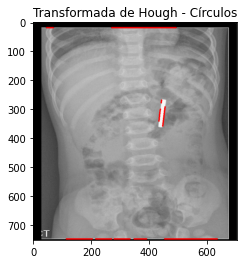

In [17]:


print(imageGauss.shape[0])
rows = imageGauss.shape[0]
circles = cv2.HoughCircles(imageGauss, cv2.HOUGH_GRADIENT, 1, rows / 8,
                               param1=170, param2=30,
                               minRadius=0, maxRadius=70)




try:
    print(len(circles[0]))
    if circles is not None:
            circles = np.uint16(np.around(circles))
            for i in circles[0, :]:
                center = (i[0], i[1])
                # circle center
                cv2.circle(image, center, 1, (0, 100, 100), 3)
                # circle outline
                radius = i[2]
                cv2.circle(image, center, radius, (255, 0, 0), 3)
except:
    print("Nenhum círculo foi encontrado")

plt.imshow(image)
plt.title("Transformada de Hough - Círculos")
plt.show()
